<a href="https://colab.research.google.com/github/rezakusnadi/Spam-Email-Classification/blob/main/Spam_Email_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Library

In [1]:
!pip install shap
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import shap

from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, BayesianRidge, LinearRegression
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score
from sklearn import svm
from xgboost import XGBClassifier
sns.set()
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 18.0 MB/s eta 0:00:00


#DataFrame

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/DatasetFrame/Spam Email Dataset

/content/drive/MyDrive/DatasetFrame/Spam Email Dataset


In [4]:
df = pd.read_csv('spam_email_dataset.csv', encoding='latin')
df.head(5)

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


#DataFrame Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Email              6000 non-null   object
 1   Subject            6000 non-null   object
 2   Sender             6000 non-null   object
 3   Recipient          6000 non-null   object
 4   Date               6000 non-null   object
 5   Time               6000 non-null   object
 6   Attachments        6000 non-null   int64 
 7   Link Count         6000 non-null   int64 
 8   Word Count         6000 non-null   int64 
 9   Uppercase Count    6000 non-null   int64 
 10  Exclamation Count  6000 non-null   int64 
 11  Question Count     6000 non-null   int64 
 12  Dollar Count       6000 non-null   int64 
 13  Punctuation Count  6000 non-null   int64 
 14  HTML Tags Count    6000 non-null   int64 
 15  Spam Indicator     6000 non-null   int64 
dtypes: int64(10), object(6)
memory usage: 750.

In [6]:
df.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000




*   Dari DataFrame terdapat 6000 data dan 16 kolom
*   `Spam Indicator` (1) is Spam (0) Non Spam
*   Target kolom `Spam Indicator` menjelaskan bahwa 50% data adalah NonSpam (1)
*   Dari Mean `Link Count` up to 5 kemungkinan Spam 49%
*   sama dengen `Uppercase Count` 75% likely sebagai Spam 49%
*   `HTML Tags Count` pada 2.5 dari maks 5.0 juga kemungkinan sebagai Spam 49%

Dari Deskripsi data di atas akan di pastikan kembali menggunakan Correlation Heatmap apakah kolom-kolom tersebut sangat berpengaruh pada penentuan `Spam Indicator`



## Unique Value Check

In [7]:
def print_unique_value(df):
    for col in df.columns:
        print(f"Column: {col}")
        print(df[col].unique())
        print("="*10)
print_unique_value(df)

Column: Email
['mikerusso@example.net' 'waynebailey@example.org' 'jill43@example.com'
 ... 'cassandravazquez@example.org' 'amoore@example.com'
 'vwilliams@example.org']
Column: Subject
['Even hotel community church.'
 'Try themselves guess fight white agreement thus although.'
 'Environmental commercial off seem any conference.' ...
 'Matter issue win agent likely.' 'Again member father.'
 'Position recognize behind boy try able.']
Column: Sender
['emilyscott@example.org' 'annwhite@example.net' 'david88@example.net' ...
 'dlewis@example.org' 'eperry@example.org' 'jason06@example.org']
Column: Recipient
['gregorysmith@example.org' 'gonzalezdaniel@example.net'
 'michellebaker@example.net' ... 'cervanteskimberly@example.org'
 'dana02@example.org' 'sjones@example.com']
Column: Date
['13-02-2023' '09-08-2023' '16-05-2023' '25-04-2023' '11-07-2023'
 '13-01-2023' '18-01-2023' '02-05-2023' '27-02-2023' '21-06-2023'
 '24-04-2023' '04-06-2023' '19-07-2023' '13-08-2023' '09-01-2023'
 '17-07-2023'

##Missing Value Info

In [8]:
def find_missing_value(data_frame):
    missing_data = data_frame.isnull().sum(axis=0).reset_index()
    missing_data.columns = ['variable', 'missing values']
    missing_data['filling factor (%)'] = (data_frame.shape[0]-missing_data['missing values'])/data_frame.shape[0]*100
    return missing_data.sort_values('filling factor (%)').reset_index(drop = True)

find_missing_value(df)

,variable,missing values,filling factor (%)
0,Email,0,100.0
1,Subject,0,100.0
2,Sender,0,100.0
3,Recipient,0,100.0
4,Date,0,100.0
5,Time,0,100.0
6,Attachments,0,100.0
7,Link Count,0,100.0
8,Word Count,0,100.0
9,Uppercase Count,0,100.0


The data at 100% Fill

##Duplicate Check

In [9]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Email, Subject, Sender, Recipient, Date, Time, Attachments, Link Count, Word Count, Uppercase Count, Exclamation Count, Question Count, Dollar Count, Punctuation Count, HTML Tags Count, Spam Indicator]
Index: []


There's no duplicate on data

#Drop Columns

In [10]:
#Copy the data before treatment
df1 = df.copy()
df1.head(5)

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


In [11]:
df1 = df1.drop(columns = ['Email','Subject','Sender','Recipient','Date','Time'])
df1.head(5)

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,3,0,191,32,3,3,0,11,1,1
1,3,9,45,1,2,1,2,8,2,1
2,3,9,52,1,4,0,2,10,1,1
3,2,3,75,6,0,2,0,8,2,0
4,3,5,299,279,0,2,0,6,1,1


#Correlation Analysis

Check the correlation on data before drop the columns for dimensional reduction and improve model interpretabilty and dependecies of the columns

In [12]:
df_corr = df1.corr(numeric_only=True)
df_corr

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
Attachments,1.000000,0.028701,-0.002115,0.002887,-0.020107,0.004543,0.019392,0.010445,-0.004140,0.013761
Link Count,0.028701,1.000000,0.022396,0.009577,0.008401,0.012846,-0.000626,0.001353,0.024588,0.001327
Word Count,-0.002115,0.022396,1.000000,0.635817,0.005551,-0.000697,0.000358,-0.002474,0.024591,-0.006414
Uppercase Count,0.002887,0.009577,0.635817,1.000000,0.006226,0.004274,-0.006474,0.021011,0.007838,-0.008214
Exclamation Count,-0.020107,0.008401,0.005551,0.006226,1.000000,-0.005900,-0.003063,0.004048,-0.008308,-0.001325
Question Count,0.004543,0.012846,-0.000697,0.004274,-0.005900,1.000000,0.004516,-0.006825,0.004366,-0.029574
Dollar Count,0.019392,-0.000626,0.000358,-0.006474,-0.003063,0.004516,1.000000,-0.031034,-0.006467,-0.010132
Punctuation Count,0.010445,0.001353,-0.002474,0.021011,0.004048,-0.006825,-0.031034,1.000000,-0.016591,-0.004693
HTML Tags Count,-0.004140,0.024588,0.024591,0.007838,-0.008308,0.004366,-0.006467,-0.016591,1.000000,0.002743
Spam Indicator,0.013761,0.001327,-0.006414,-0.008214,-0.001325,-0.029574,-0.010132,-0.004693,0.002743,1.000000


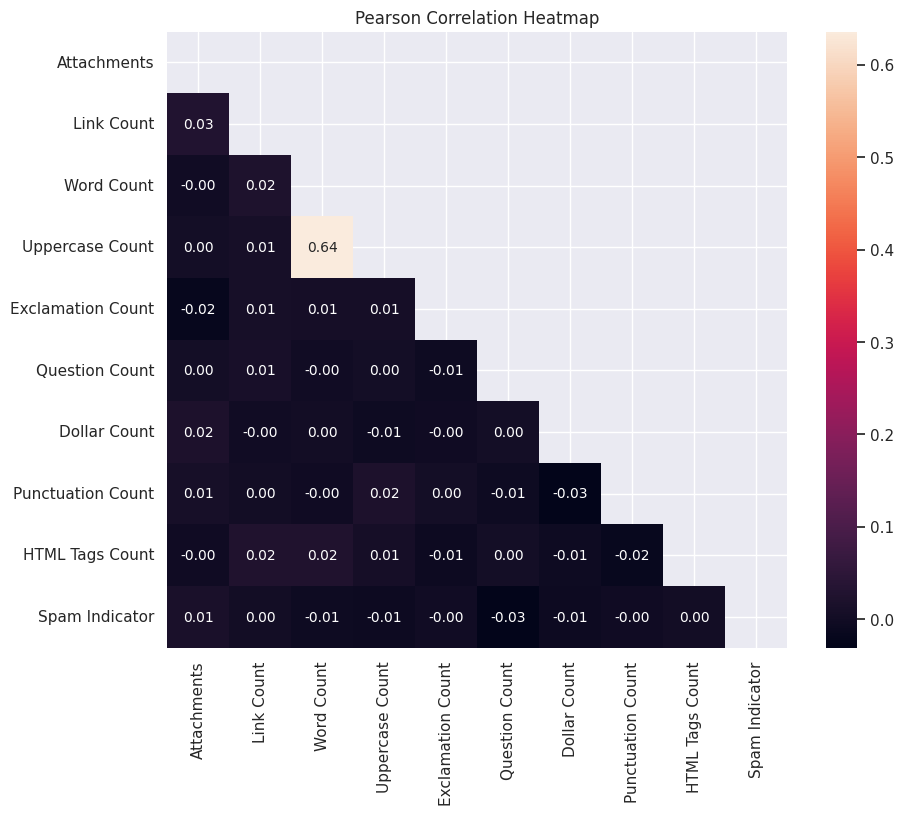

In [13]:
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_corr,mask=mask,
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

##//For Check highly corelation features with treshold

In [14]:
threshold = 0.2
high_corr_pairs = [(i, j) for i in df_corr.columns for j in df_corr.columns
                   if i != j and abs(df_corr.loc[i, j]) > threshold]
print("Highly correlated pairs:", high_corr_pairs)

Highly correlated pairs: [('Word Count', 'Uppercase Count'), ('Uppercase Count', 'Word Count')]


#Target Analysis

In [15]:
print(df1['Spam Indicator'].value_counts())

Spam Indicator
0    3018
1    2982
Name: count, dtype: int64


In [16]:
target = df1['Spam Indicator'].value_counts().reset_index()
target.rename(columns={'index':'Spam Indicator','freq':'Spam Indicator'}, inplace=True)
target['percentage'] = (target['count'] / target['count'].sum()) * 100
target

,Spam Indicator,count,percentage
0,0,3018,50.3
1,1,2982,49.7


<ipython-input-17-eb268a55e539>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = default.index, y = default.values, palette=colors)


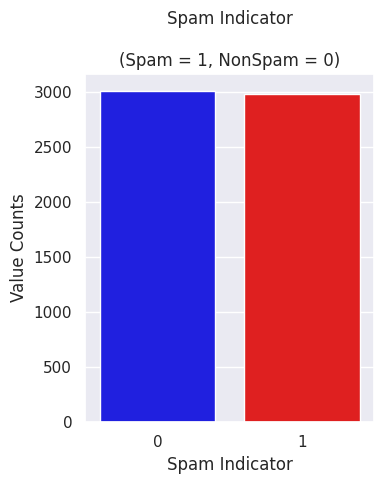

In [17]:
default = df1['Spam Indicator'].value_counts()
fig,ax=plt.subplots(figsize=(4,5))
colors = ['blue', 'red']
plt.title("Spam Indicator\n\n(Spam = 1, NonSpam = 0)")
sns.barplot(x = default.index, y = default.values, palette=colors)
plt.ylabel('Value Counts')
plt.xlabel('Spam Indicator')
plt.tight_layout()
plt.show()

##On Percentage

<ipython-input-18-86caf3648a83>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = default.index, y = default.values, palette=colors)


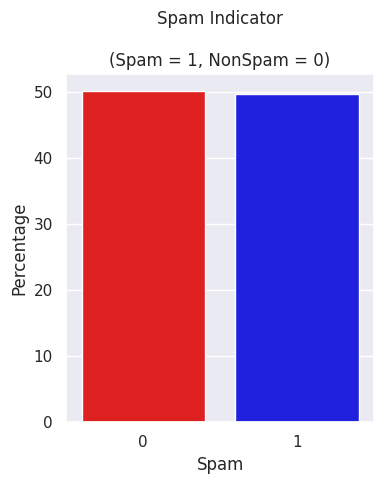

In [18]:
default = df1['Spam Indicator'].value_counts(True)*100
fig,ax=plt.subplots(figsize=(4,5))
colors = ['red', 'blue']
plt.title("Spam Indicator\n\n(Spam = 1, NonSpam = 0)")
sns.barplot(x = default.index, y = default.values, palette=colors)
plt.ylabel('Percentage')
plt.xlabel('Spam')
plt.tight_layout()
plt.show()

- Since the data balanced , we just straight to split and modeling the data

##//Most freq words on Spam

In [19]:
spam_carpos = []
for sentence in df1[df1['Spam Indicator'] == 1]['Subject'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

KeyError: 'Subject'

In [ ]:
from collections import Counter
filter_df1 = pd.DataFrame(Counter(spam_carpos).most_common(10))

In [ ]:
sns.barplot(data = filter_df1, x = filter_df1[0], y = filter_df1[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

#//Outlier Check

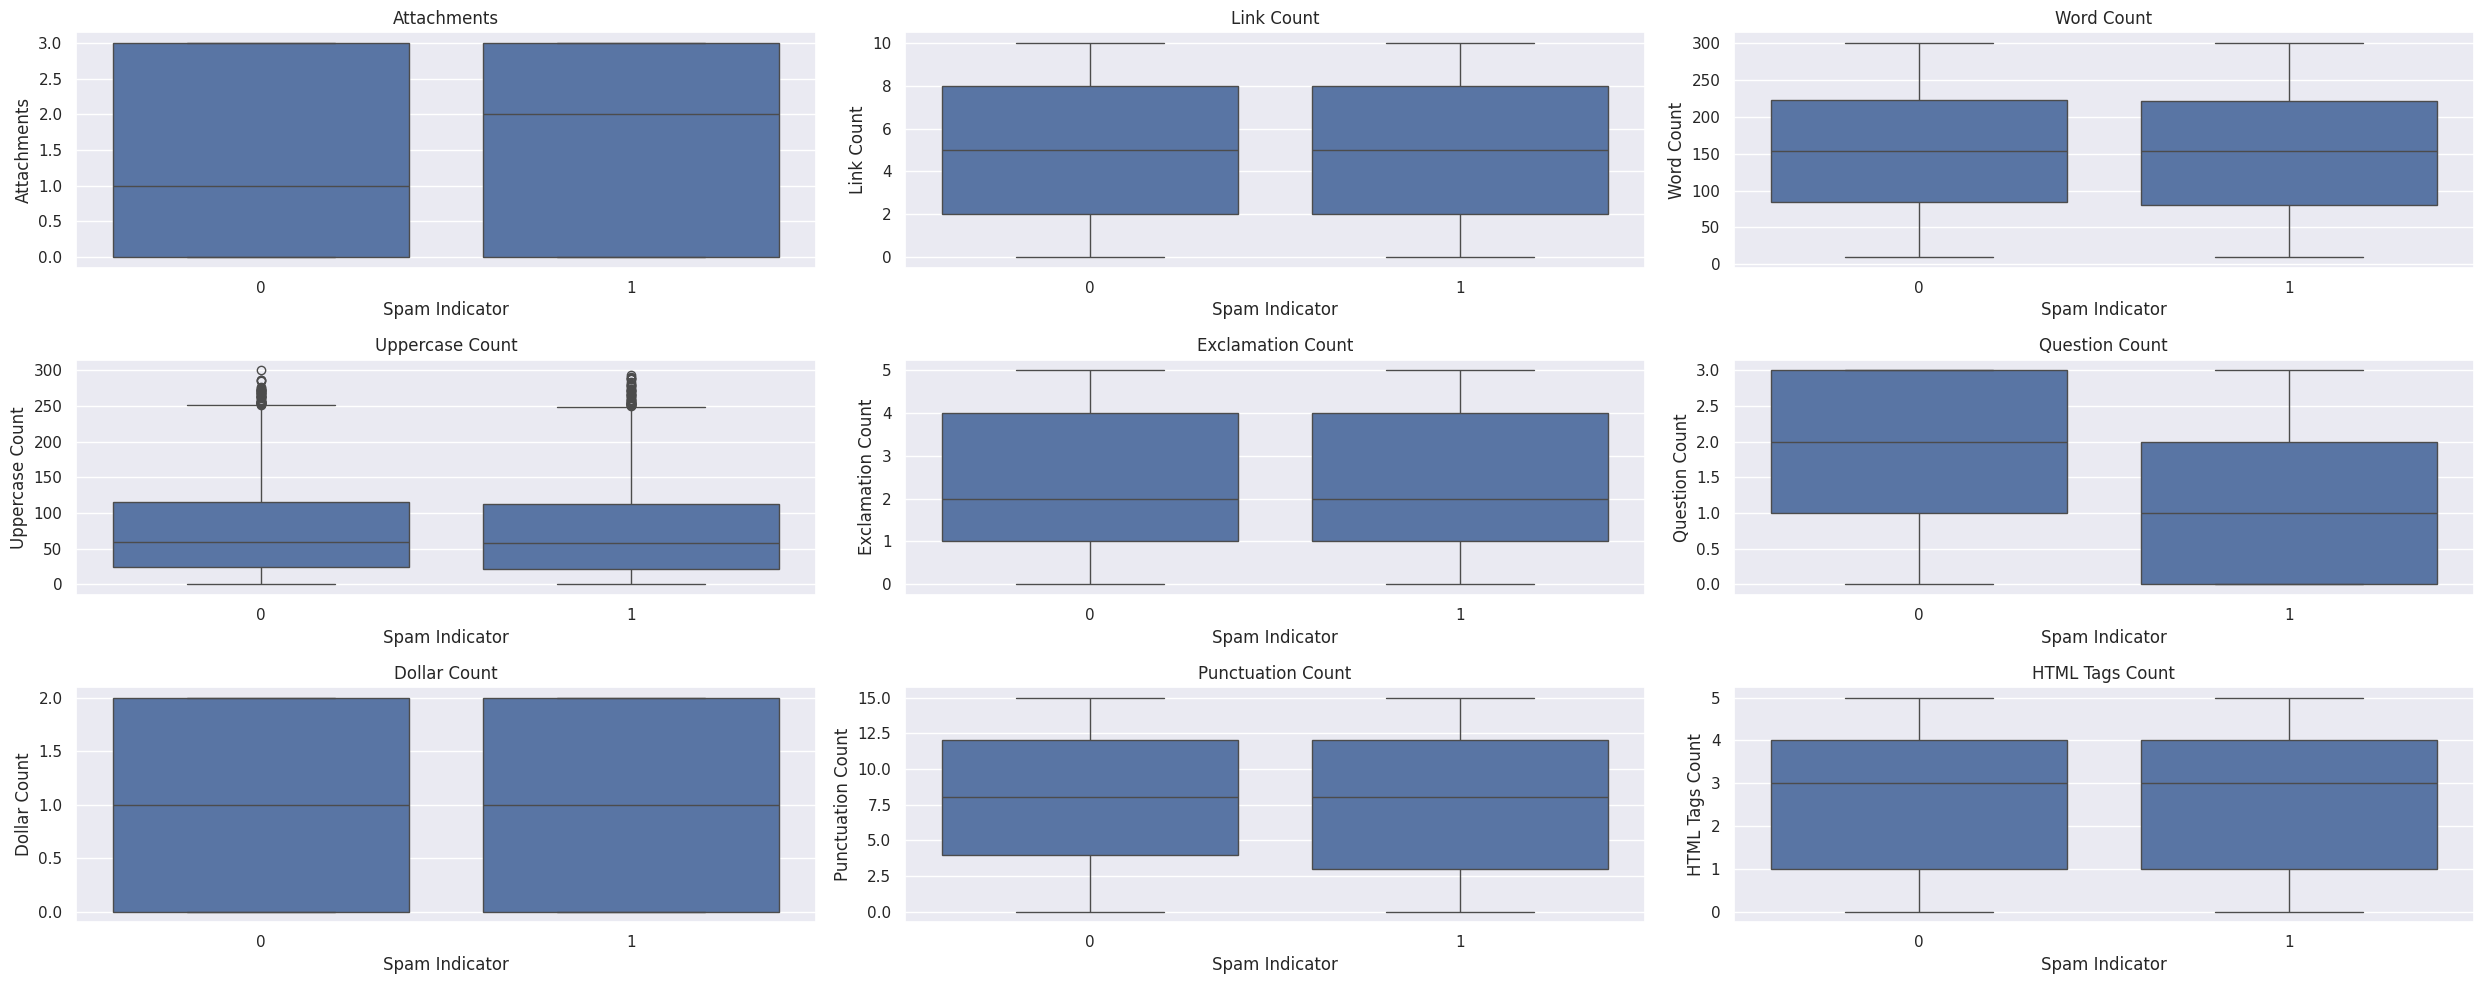

In [ ]:
a = 1
df_n_check = df.loc[:,	['Attachments','Link Count','Word Count','Uppercase Count',
                    'Exclamation Count','Question Count','Dollar Count','Punctuation Count','HTML Tags Count', 'Spam Indicator']]
boxplot_cek = df_n_check.iloc[:,:-1]
fig, axes = plt.subplots(3,9,figsize=(25,10))

for i in boxplot_cek:
    plt.subplot(3,3,a)
    a+=1
    ax = sns.boxplot(y=i, x='Spam Indicator', data=df_n_check)
    plt.tight_layout()
    plt.title(i)

#//Filter Features by Variance

In [ ]:
df1.select_dtypes(include=np.number).var().sort_values(ascending = False)

,0
Word Count,6911.552462
Uppercase Count,4190.693777
Punctuation Count,21.387098
Link Count,10.024140
Exclamation Count,2.951162
HTML Tags Count,2.901986
Attachments,1.266873
Question Count,1.251679
Dollar Count,0.659833
Spam Indicator,0.250033


In [ ]:
cat_0=[]
num_0=[]
for i in df1.columns:
  if df1[i].dtype=='int64':
    num_0.append(i)
  else:
    cat_0.append(i)
print('num = ',num_0)
print('cat = ',cat_0)

num =  ['Attachments', 'Link Count', 'Word Count', 'Uppercase Count', 'Exclamation Count', 'Question Count', 'Dollar Count', 'Punctuation Count', 'HTML Tags Count', 'Spam Indicator']
cat =  []


#Split The data into Train and Test

In [20]:
df1.head(5)

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,3,0,191,32,3,3,0,11,1,1
1,3,9,45,1,2,1,2,8,2,1
2,3,9,52,1,4,0,2,10,1,1
3,2,3,75,6,0,2,0,8,2,0
4,3,5,299,279,0,2,0,6,1,1


In [21]:
X = df1.drop(['Spam Indicator'],axis=1)
y = df1['Spam Indicator']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [23]:
y_train.value_counts()

,count
Spam Indicator,
0,2251
1,2249


##Scale the data

In [24]:
#scale the Xtrain
scaler = MinMaxScaler()
df1_scaler_Xtrain = scaler.fit_transform(X_train)

In [25]:
#scale the XTest
df1_scaler_Xtest = scaler.transform(X_test)

#Model

##Logistic Regression

In [ ]:
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(df1_scaler_Xtrain, y_train)
logreg_pred = logreg_model.predict(df1_scaler_Xtest)

###Evaluate

In [ ]:
#Model Evaluate Overall
pd.DataFrame(data = [accuracy_score(y_test, logreg_pred),
             precision_score(y_test,logreg_pred),
             recall_score(y_test,logreg_pred),
             roc_auc_score(y_test,logreg_pred),
             f1_score(y_test,logreg_pred)],
             index = ['accuracy','precision','recall','f1_score','AUC'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.506000
precision,0.494764
recall,0.515689
f1_score,0.506215
AUC,0.505010


In [ ]:
#classification_report Evaluate
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51       767
           1       0.49      0.52      0.51       733

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.51      0.51      0.51      1500



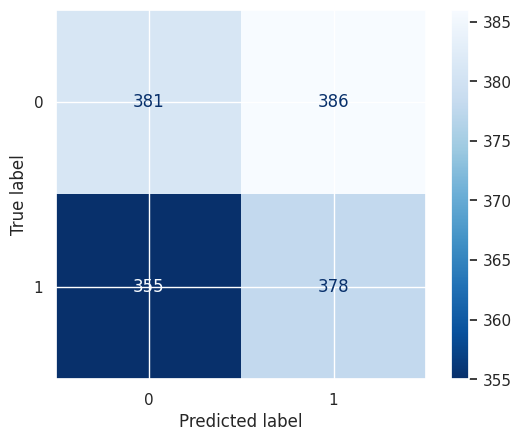

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, logreg_pred), display_labels=logreg_model.classes_)
disp.plot(cmap="Blues_r")
plt.show()

- Penggunaan model menunjukkan Logistic Regression hanya mencapai 51% accuracy
- F1-Score 50% kinerja seimbang antara Precision dan Recall
- Confusion matrix, Model cenderung overpredict. Jumlah False Positive (386) lebih tinggi dibandingkan False Negative (355). Model cenderung mengklasifikasikan sampel sebagai Spam(1) meskipun ternyata NonSpam (0).

##Random Forest

In [ ]:
Randfo_model = RandomForestClassifier(random_state=42)
Randfo_model.fit(df1_scaler_Xtrain, y_train)
Randfo_preds = Randfo_model.predict(df1_scaler_Xtest)

###Evaluate

In [ ]:
#Model Evaluate Overall
pd.DataFrame(data = [accuracy_score(y_test, Randfo_preds),
             precision_score(y_test,Randfo_preds),
             recall_score(y_test,Randfo_preds),
             roc_auc_score(y_test,Randfo_preds),
             f1_score(y_test,Randfo_preds)],
             index = ['accuracy','precision','recall','f1_score','AUC'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.493333
precision,0.480349
recall,0.450205
f1_score,0.492377
AUC,0.464789


In [ ]:
#classification_report Evaluate
print(classification_report(y_test, Randfo_preds))

              precision    recall  f1-score   support

           0       0.50      0.53      0.52       767
           1       0.48      0.45      0.46       733

    accuracy                           0.49      1500
   macro avg       0.49      0.49      0.49      1500
weighted avg       0.49      0.49      0.49      1500



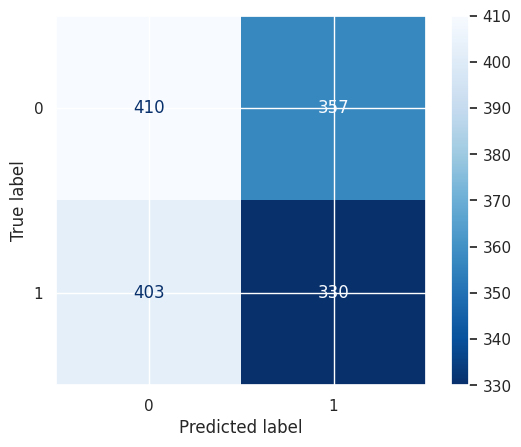

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, Randfo_preds), display_labels=Randfo_model.classes_)
disp.plot(cmap="Blues_r")
plt.show()

- Overal Evaluasi menunjukkan penggunaan Random Forest Classifier hanya mencapai 49% accuracy lebih rendah dibandingan Logistic Regression
- Nilai Recall lebih rendah pada kategori Spam(1) mengidentifikasikan bahwa model masih kesulitan dalam menentukan Spam
- Precision yang rendah 0.48 model masih sering mengidentifikasi NonSpam(0) menjadi Spam(1) False Positive
- Confusion matrix, Model cenderung seimbang. Jumlah False Positive (357) lebih dan False Negative (403). Model tidak bias ke salah satu kategori

##Decision Tree

In [ ]:
Dectree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20,random_state=42)
Dectree.fit(df1_scaler_Xtrain, y_train)
Dectree_pred = Dectree.predict(df1_scaler_Xtest)

###Evaluate

In [ ]:
#Model Evaluate Overall
pd.DataFrame(data = [accuracy_score(y_test, Dectree_pred),
             precision_score(y_test,Dectree_pred),
             recall_score(y_test,Dectree_pred),
             roc_auc_score(y_test,Dectree_pred),
             f1_score(y_test,Dectree_pred)],
             index = ['accuracy','precision','recall','f1_score','AUC'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.512000
precision,0.500703
recall,0.485675
f1_score,0.511417
AUC,0.493075


In [ ]:
#classification_report Evaluate
print(classification_report(y_test, Dectree_pred))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       767
           1       0.50      0.49      0.49       733

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.51      0.51      0.51      1500



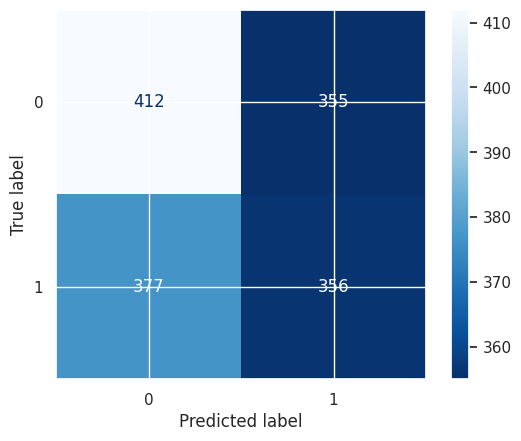

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, Dectree_pred), display_labels=Dectree.classes_)
disp.plot(cmap="Blues_r")
plt.show()

##XGBoost

In [ ]:
xgb_model = XGBClassifier(max_depth= 3, min_child_weight= 2, n_estimators= 50)
xgb_model.fit(df1_scaler_Xtrain, y_train)
xgb_preds = xgb_model.predict(df1_scaler_Xtest)

###Evaluate

In [ ]:
#Model Evaluate Overall
pd.DataFrame(data = [accuracy_score(y_test, xgb_preds),
             precision_score(y_test,xgb_preds),
             recall_score(y_test,xgb_preds),
             roc_auc_score(y_test,xgb_preds),
             f1_score(y_test,xgb_preds)],
             index = ['accuracy','precision','recall','f1_score','AUC'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.503333
precision,0.491758
recall,0.488404
f1_score,0.503002
AUC,0.490075


In [ ]:
#classification_report Evaluate
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.51      0.52      0.52       767
           1       0.49      0.49      0.49       733

    accuracy                           0.50      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.50      0.50      0.50      1500



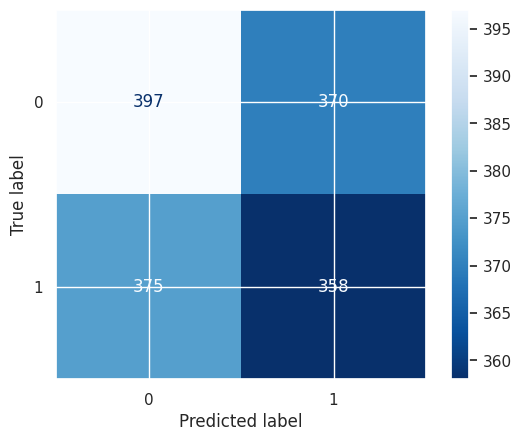

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, xgb_preds), display_labels=xgb_model.classes_)
disp.plot(cmap="Blues_r")
plt.show()

##LightGBM

In [ ]:
import lightgbm as lgb
lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(df1_scaler_Xtrain, y_train)
lgbm_pred = lgbm_model.predict(df1_scaler_Xtest)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 2249, number of negative: 2251
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001131 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 4500, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499778 -> initscore=-0.000889
[LightGBM] [Info] Start training from score -0.000889


###Evaluate

In [ ]:
#Model Evaluate Overall
pd.DataFrame(data = [accuracy_score(y_test, lgbm_pred),
             precision_score(y_test,lgbm_pred),
             recall_score(y_test,lgbm_pred),
             roc_auc_score(y_test,lgbm_pred),
             f1_score(y_test,lgbm_pred)],
             index = ['accuracy','precision','recall','f1_score','AUC'],
             columns=['Score (%)'])

,Score (%)
accuracy,0.517333
precision,0.506494
recall,0.478854
f1_score,0.516480
AUC,0.492286


In [ ]:
#classification_report Evaluate
print(classification_report(y_test, lgbm_pred))

              precision    recall  f1-score   support

           0       0.53      0.55      0.54       767
           1       0.51      0.48      0.49       733

    accuracy                           0.52      1500
   macro avg       0.52      0.52      0.52      1500
weighted avg       0.52      0.52      0.52      1500



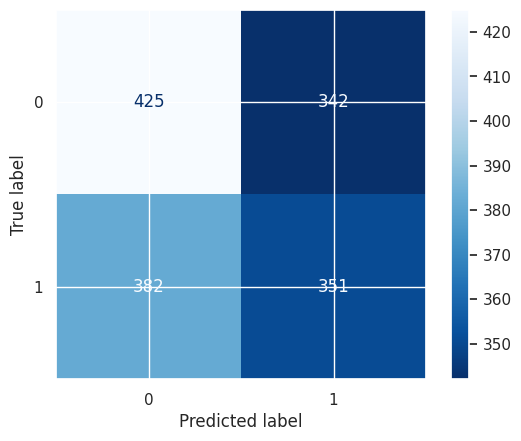

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, lgbm_pred), display_labels=lgbm_model.classes_)
disp.plot(cmap="Blues_r")
plt.show()

#Conclusion

Dari berbagai performa model di atas kurang memuaskan tidak ada yang di atas 52% sehingga dilanjutkan menggunakan hyperparameter dengan akurasi model tertinggi LightGBM

#Hyperparameter

In [ ]:
Dectree = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=20,random_state=42)
Dectree.fit(df1_scaler_Xtrain, y_train)
Dectree_pred = Dectree.predict(df1_scaler_Xtest)
print("Decision tree accuracy score before parameter tuning : "
      ,accuracy_score(y_test, Dectree_pred))

Decision tree accuracy score before parameter tuning :  0.512


In [ ]:
#definisi Grid untuk Hyperparameter tuning
kfold = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True)
grid_Dectree = {'max_depth':range(1,50,2),
             'min_samples_split':range(10,100,5),
             'criterion':('gini', 'entropy'),
             'splitter' : ('best', 'random')
            }

#inisiasi best GridSearchCV
grid_search = GridSearchCV(estimator = Dectree,cv = kfold, param_grid = grid_Dectree, n_jobs = 10,
                             return_train_score = True, scoring = 'accuracy')

#Fit model ke data
grid_search.fit(df1_scaler_Xtrain, y_train)

# Cetak hasil terbaik
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_}")

# Prediksi dengan model terbaik
best_model = grid_search.best_estimator_
Dectree_pred = best_model.predict(df1_scaler_Xtest)

# Hitung akurasi pada data test
accuracy = accuracy_score(y_test, Dectree_pred)
print(f"Test Accuracy: {accuracy}")

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 85, 'splitter': 'random'}
Best Accuracy: 0.5142222222222221
Test Accuracy: 0.5193333333333333
